In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data_fixed.csv")
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.473452,198992,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,0.218756,253100,CVA,no,no,no,no,no,67.0,100,NoRisk
2,0.131260,155737,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,0.102954,251222,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,0.236142,197183,CVA,no,no,no,no,no,89.0,30,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.587315,113117,Asx,no,yes,yes,yes,no,74.0,100,Risk
1516,0.932265,103595,CVA,no,yes,yes,no,no,84.0,50,NoRisk
1517,0.876531,211309,CVA,no,no,yes,no,no,76.0,20,NoRisk
1518,0.812032,116379,TIA,no,no,yes,yes,no,75.0,35,NoRisk


# Data Preparation

In [3]:
# I searched for duplicate rows in dataframe to make sure there were no repeated patient sessions
duplicate = df[df.duplicated(subset = 'Id')]
duplicate

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


In [4]:
#I found no dupplicates so I dropped both Random and Id column
my_df = df.drop(['Random','Id'], axis = 1)
my_df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,CVA,no,no,no,no,no,67.0,100,NoRisk
2,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,CVA,no,no,no,no,no,89.0,30,NoRisk
...,...,...,...,...,...,...,...,...,...
1515,Asx,no,yes,yes,yes,no,74.0,100,Risk
1516,CVA,no,yes,yes,no,no,84.0,50,NoRisk
1517,CVA,no,no,yes,no,no,76.0,20,NoRisk
1518,TIA,no,no,yes,yes,no,75.0,35,NoRisk


Cleaning the Indication column:

In [5]:
#finding the different values under the indication column to see if there are any others from the 4 that have been stated
#there should only be 4 values, "Asx" might have been mispelt and should be "ASx"
IndicationValues = df['Indication']
IndicationValues.value_counts()

A-F    493
CVA    416
TIA    390
ASx    186
Asx     32
Name: Indication, dtype: int64

In [6]:
#I also check for any Nan values in Indication
findNan = my_df['Indication'].isnull()
findNan.value_counts()

False    1517
True        3
Name: Indication, dtype: int64

In [7]:
#I am replacing the Nan values in the Indication column with A-F as it is the mode.
#I choose to replace it with the mode because it occurs the most therefore is most likely to be an A-F indicator
#these are categorical data points so the mode is best suited
IvMode = IndicationValues.mode()
print(IvMode)
my_df['Indication'].fillna('A-F', inplace = True)

0    A-F
dtype: object


In [8]:
#checking to see if the null values have been replaced
x=my_df['Indication'].isnull()
x.value_counts()

False    1520
Name: Indication, dtype: int64

In [9]:
#checking to see that the 'A-F' value has increased by 3
my_df['Indication'].value_counts()


A-F    496
CVA    416
TIA    390
ASx    186
Asx     32
Name: Indication, dtype: int64

In [10]:
#I changed all the 'Asx' values to 'ASx' as it appears to be a mistake in the dataset
#Found the replace function on the pandas documentation
my_df['Indication'].replace('Asx', 'ASx', inplace = True )

In [11]:
# Now there are four different type of values like there's suppose to be 
my_df['Indication'].value_counts()

A-F    496
CVA    416
TIA    390
ASx    218
Name: Indication, dtype: int64

In [12]:
#I'm checking to see if 1515 is changed to 'ASx'
my_df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,CVA,no,no,no,no,no,67.0,100,NoRisk
2,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,CVA,no,no,no,no,no,89.0,30,NoRisk
...,...,...,...,...,...,...,...,...,...
1515,ASx,no,yes,yes,yes,no,74.0,100,Risk
1516,CVA,no,yes,yes,no,no,84.0,50,NoRisk
1517,CVA,no,no,yes,no,no,76.0,20,NoRisk
1518,TIA,no,no,yes,yes,no,75.0,35,NoRisk


Cleaning the History column

In [13]:
#finding any NaN values in the hitory column
HistoryNan = my_df['History'].isnull().value_counts()
HistoryNan

False    1518
True        2
Name: History, dtype: int64

In [14]:
#I want to have a look at both rows to see if there is any similarities in the other between their other column values that would help me make a prediction on the history column
print(my_df[my_df['History'].isnull()])

     Indication Diabetes  IHD Hypertension Arrhythmia History  IPSI Contra  \
54          CVA       no  yes           no         no     NaN  84.0     50   
1163        CVA       no   no          yes        yes     NaN  94.0    100   

       label  
54    NoRisk  
1163    Risk  


In [15]:
#finding the mode of the history column
my_df['History'].value_counts()

no     1494
yes      24
Name: History, dtype: int64

In [16]:
#I choose to use the mode because the overhelming majority of the dataset has a 'no' for history. 
#Because it is only two records missing the columns,changing both to the mode shouldnt have a drastic impact in the modelling stage
HistoryMode = my_df['History'].mode()
print(HistoryMode)
my_df['History'].fillna('no', inplace = True)

0    no
dtype: object


In [17]:
#seeing if the null values have been removed
my_df['History'].isnull().value_counts()

False    1520
Name: History, dtype: int64

cleaning the Diabetes column

In [18]:
#checking for Nan values in the diabetes column
my_df['Diabetes'].isnull().value_counts()

False    1518
True        2
Name: Diabetes, dtype: int64

In [19]:
#seeing if there are any similarities I can spot between the two records to help me predict 
my_df[my_df['Diabetes'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
43,A-F,NaN,no,yes,no,no,79.0,40,NoRisk
1406,CVA,NaN,yes,yes,yes,no,89.0,100,Risk


In [20]:
my_df['Diabetes'].value_counts()

no     1441
yes      77
Name: Diabetes, dtype: int64

In [21]:
#changing the NaN values to no as it is the mode 
my_df['Diabetes'].fillna('no', inplace = True)

In [22]:
#checking no NaN values exist in the column
my_df['Diabetes'].isnull().value_counts()

False    1520
Name: Diabetes, dtype: int64

Cleaning the IHD column

In [23]:
#IHD has no NaN values to change
my_df['IHD'].isnull().value_counts()

False    1520
Name: IHD, dtype: int64

In [24]:
#checking that there are only yes or no values in the column 
my_df['IHD'].value_counts()

no     801
yes    719
Name: IHD, dtype: int64

cleaning the Hypertension column

In [25]:
#looking for NaN values in the hypertension section
print(my_df['Hypertension'].isnull().value_counts())
my_df['Hypertension'].value_counts()

False    1517
True        3
Name: Hypertension, dtype: int64


no     784
yes    733
Name: Hypertension, dtype: int64

In [26]:
#seeing if there are any similarities I can spot between the two records to help me predict 
my_df[my_df['Hypertension'].isnull()]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
21,CVA,yes,no,NaN,yes,no,94.0,90,Risk
805,A-F,no,no,NaN,no,no,77.0,30,NoRisk
1222,TIA,no,no,NaN,no,no,74.0,75,NoRisk


In [27]:
#I transformed the hypertension and label Column to help me visualize the two columns
hypeDummy = pd.get_dummies(my_df.drop(['Indication', 'Diabetes', 'IHD', 'Arrhythmia', 'History','IPSI','Contra'], axis =1))
hypeDummy 

,Hypertension_no,Hypertension_yes,label_NoRisk,label_Risk,label_Unknown
0,0,1,0,1,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1515,0,1,0,1,0
1516,0,1,1,0,0
1517,0,1,1,0,0
1518,0,1,1,0,0


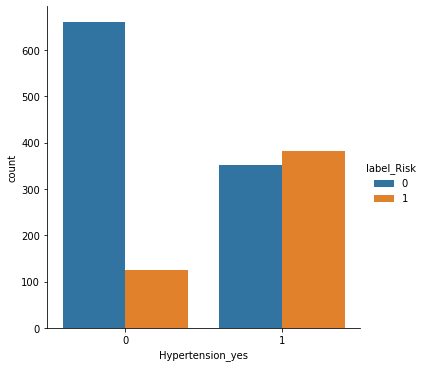

In [28]:
#Plotted the graph to see see if those with hypertension are more likely to be be at risk or not
#shows me that a patient without hypertension most likely isnt at risk while one with hypertension most likely is at risk
sns.catplot(data= hypeDummy, x= 'Hypertension_yes', kind= 'count', hue= 'label_Risk'  )

In [29]:
#changed this patients hypertension to yes because they're labelled at risk
my_df.loc[21, 'Hypertension'] ='yes'

In [30]:
#replacing the other two NaN values with 'no' because their label is no risk
my_df['Hypertension'].fillna('no', inplace = True)

my_df['Hypertension'].isnull().value_counts()

False    1520
Name: Hypertension, dtype: int64

In [31]:
# checking that they have been changed in my copy of the dataframe
print(my_df.loc[21], my_df.loc[805], my_df.loc[1222])

Indication       CVA
Diabetes         yes
IHD               no
Hypertension     yes
Arrhythmia       yes
History           no
IPSI              94
Contra            90
label           Risk
Name: 21, dtype: object Indication         A-F
Diabetes            no
IHD                 no
Hypertension        no
Arrhythmia          no
History             no
IPSI                77
Contra              30
label           NoRisk
Name: 805, dtype: object Indication         TIA
Diabetes            no
IHD                 no
Hypertension        no
Arrhythmia          no
History             no
IPSI                74
Contra              75
label           NoRisk
Name: 1222, dtype: object


Cleaning Arrhythmia

In [32]:
#making sure there are only yes and no values in Arrhythmia column
print(my_df['Arrhythmia'].value_counts())

#checking for any Nan Values
my_df['Arrhythmia'].isnull().value_counts()

no     1190
yes     330
Name: Arrhythmia, dtype: int64


False    1520
Name: Arrhythmia, dtype: int64

Cleaning IPSI

In [33]:
#checking for Nan values in the column
print(my_df['IPSI'].isnull().value_counts())

#making sure there are only numeric values between 1-100 inclusive in the IPSI column
my_df['IPSI'].value_counts()

False    1516
True        4
Name: IPSI, dtype: int64


69.0    231
74.0    222
79.0    188
89.0    175
94.0    157
72.0     83
84.0     77
75.0     75
77.0     50
67.0     32
98.0     31
59.0     29
80.0     28
81.0     25
49.0     23
64.0     14
70.0     13
78.0     13
54.0      9
76.0      9
50.0      7
96.0      7
73.0      7
68.0      3
71.0      2
66.0      2
83.0      2
34.0      1
97.0      1
Name: IPSI, dtype: int64

In [34]:
my_df[my_df['IPSI'] == 'NaN']

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


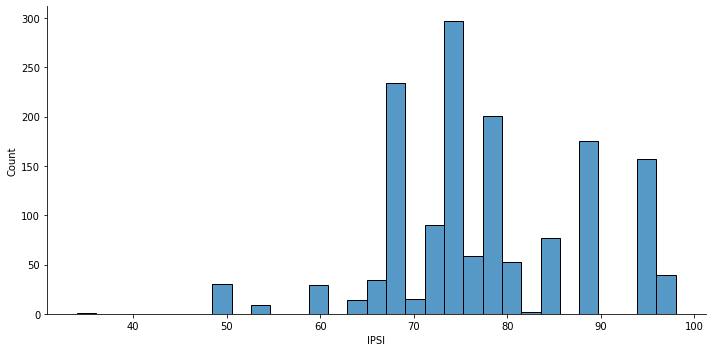

In [35]:
# modelling the IPSI column to visualise data and look anomalies and to see were most of the values lie
#the graph makes me consider that the 34. might be an anomaly
sns.displot(data = my_df['IPSI'], aspect= 2)

<AxesSubplot:xlabel='IPSI'>

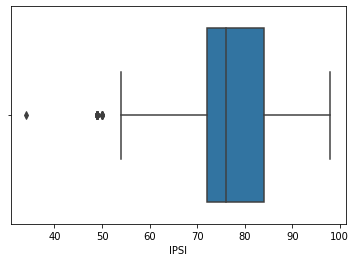

In [36]:
# from this boxplot I can see there is a slight positive skew. So I will use the median to replace the NaN values
sns.boxplot(data= my_df, x = 'IPSI',)

In [37]:
#I chose to replace the NaN value with the median so that the outlier value would have less of an effect on the dataset
IPSIMedian = my_df['IPSI'].median()
print(IPSIMedian)
my_df['IPSI'].fillna( IPSIMedian, inplace = True)

76.0


In [38]:
my_df['IPSI'].isnull().value_counts()

False    1520
Name: IPSI, dtype: int64

In [39]:
#finding the anomolious value in th IPSI column
my_df[my_df['IPSI'] == 34.0]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1021,TIA,no,no,no,no,no,34.0,35,NoRisk


In [40]:
#replacing it with  the median value of IPSI
my_df["IPSI"].replace(to_replace= 34.0, value = IPSIMedian, inplace = True)

#checking if the anaomly still exsits 
my_df[my_df['IPSI'] == 34.0]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


In [41]:
#checking that the value was changed to the median
#
my_df[my_df['IPSI'] == IPSIMedian]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
46,A-F,no,no,no,no,no,76.0,50,NoRisk
89,CVA,no,yes,yes,yes,no,76.0,100,Risk
98,CVA,no,no,yes,no,no,76.0,20,NoRisk
134,A-F,no,no,no,no,no,76.0,100,Risk
161,TIA,no,no,yes,no,no,76.0,20,NoRisk
335,TIA,no,no,yes,no,no,76.0,25,NoRisk
464,CVA,no,no,no,no,no,76.0,20,NoRisk
591,CVA,no,no,yes,no,no,76.0,20,NoRisk
830,TIA,no,no,yes,no,no,76.0,20,NoRisk
900,CVA,no,no,yes,no,no,76.0,20,NoRisk


Cleaning the Contra Column

In [42]:
#checking that all the values are between 0-100 inclusive 
my_df['Contra'].value_counts()

100    283
20     192
50     186
30     163
40     110
60      99
75      61
70      53
80      53
10      50
90      45
85      35
95      32
25      30
35      27
55      23
15      18
65      17
51      11
53       9
73       7
45       6
16       4
62       3
79       2
         1
Name: Contra, dtype: int64

In [43]:
#checking for NaN values
my_df['Contra'].isnull().value_counts()

False    1520
Name: Contra, dtype: int64

In [44]:
# when finding the range of values in the column, i noticed that there was a blank column so I put a NaN value there
my_df['Contra'].replace(' ', np.nan, inplace = True)

In [45]:

print(my_df['Contra'].isnull().value_counts())

False    1519
True        1
Name: Contra, dtype: int64


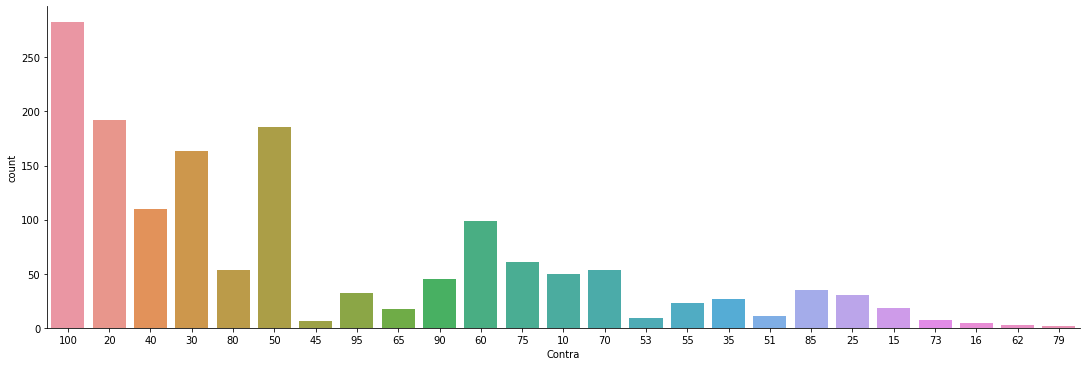

In [46]:
# using this graph I can see that some numbers are being repeated 
sns.catplot(data = my_df, x = 'Contra', kind = 'count', aspect = 3)

In [47]:
ContraMedian = my_df['Contra'].median()
print(ContraMedian)

50.0


In [48]:
#replacing the NaN value with the mode value
my_df['Contra'].fillna(ContraMedian, inplace= True)
my_df['Contra'].isnull().value_counts()

False    1520
Name: Contra, dtype: int64

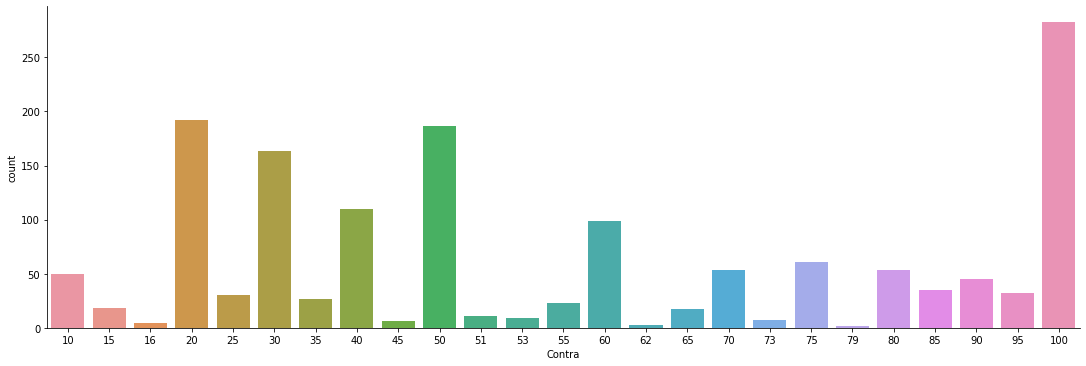

In [49]:
#changed the value types to integers to get rid of string duplicates 
my_df['Contra'] = my_df['Contra'].astype(int)
sns.catplot(data = my_df, x = 'Contra', kind = 'count', aspect = 3)

Transforming the dataframe

In [50]:
my_dfcopy = my_df.drop(['IPSI', 'Contra'], axis = 1)
my_dfcopy

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,label
0,CVA,yes,yes,yes,yes,no,Risk
1,CVA,no,no,no,no,no,NoRisk
2,CVA,no,yes,yes,no,no,NoRisk
3,A-F,no,yes,no,no,no,NoRisk
4,CVA,no,no,no,no,no,NoRisk
...,...,...,...,...,...,...,...
1515,ASx,no,yes,yes,yes,no,Risk
1516,CVA,no,yes,yes,no,no,NoRisk
1517,CVA,no,no,yes,no,no,NoRisk
1518,TIA,no,no,yes,yes,no,NoRisk


In [51]:
Prepare_for_dummies = my_dfcopy

In [52]:
#transforming the indication, diabetes, IHD, hypertension, Arrhythmia, history and label correlation

dummydf = pd.get_dummies(Prepare_for_dummies)
dummydf

,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA,Diabetes_no,Diabetes_yes,IHD_no,IHD_yes,Hypertension_no,Hypertension_yes,Arrhythmia_no,Arrhythmia_yes,History_no,History_yes,label_NoRisk,label_Risk,label_Unknown
0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0
1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
2,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
3,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0
4,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0
1516,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
1517,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0
1518,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0


In [53]:

frames = [my_df, dummydf]
concatdf = pd.concat(frames, axis = 1)
concatdf.drop(['Diabetes', 'IHD', 'Hypertension', 'Arrhythmia', 'History', 'Indication', 'label'], axis = 1, inplace = True)
concatdf

,IPSI,Contra,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA,Diabetes_no,Diabetes_yes,IHD_no,IHD_yes,Hypertension_no,Hypertension_yes,Arrhythmia_no,Arrhythmia_yes,History_no,History_yes,label_NoRisk,label_Risk,label_Unknown
0,89.0,100,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0
1,67.0,100,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
2,79.0,20,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
3,69.0,40,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0
4,89.0,30,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,74.0,100,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0
1516,84.0,50,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
1517,76.0,20,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0
1518,75.0,35,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0


In [54]:
correlation = concatdf.corr()


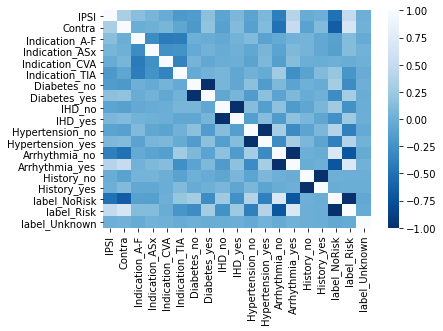

In [55]:
#I used the graph to visualise the correlation between certain attributes in comparison to the label column
#this heatmap also allowed me to see that there are 'Unknown' values inthe label columns where it should only be risk and norisk
my_heatmap = sns.heatmap(correlation, cmap = 'Blues_r')

Cleaning the label column

In [56]:
my_df['label'].value_counts()

NoRisk     1008
Risk        507
Unknown       2
Name: label, dtype: int64

In [57]:
#getting the records with unknown labels 
#from the correlation heat map, I see there is a posititve correlation between having Arrhythmia, Contra and IPSI to the Risk of the patient
my_df[my_df['label'] == 'Unknown']

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1415,ASx,no,yes,yes,no,no,69.0,55,Unknown
1467,CVA,no,no,yes,yes,no,94.0,100,Unknown


In [58]:
#I changed the first column to NoRisk because it had a no under Arrhythmia 
my_df.loc[1415, 'label'] ='NoRisk'

In [59]:
#checking to see that there is only one unknown value left
my_df[my_df['label'] == 'Unknown']

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1467,CVA,no,no,yes,yes,no,94.0,100,Unknown


In [60]:
#I changed the second column to Risk because it had a yes under Arrhythmia and a High IPSI and Contra value
my_df.loc[1467, 'label'] = 'Risk'

In [61]:
#checking to if they are any unknown values left
my_df[my_df['label'] == 'Unknown']

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


In [62]:
my_df['label'].isnull().value_counts()

False    1517
True        3
Name: label, dtype: int64

In [63]:
#finding the Nan values
Nan_labels = np.where(pd.isnull(my_df['label']))
print(Nan_labels)

(array([155, 202, 471], dtype=int64),)


In [64]:
my_df.loc[Nan_labels]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
155,TIA,yes,no,no,no,yes,89.0,50,NaN
202,CVA,no,yes,yes,yes,no,79.0,70,NaN
471,CVA,no,yes,yes,no,no,75.0,50,NaN


In [65]:
# Based on the correlation graph, I labelled the patients based on on arrhythmia, contra, Hypertension and IPSI
my_df.loc[155, 'label']= 'NoRisk'
my_df.loc[202, 'label']= 'Risk'
my_df.loc[471, 'label']= 'NoRisk'

In [66]:
my_df['label'].isnull().value_counts()

False    1520
Name: label, dtype: int64

Transforming the Cleaned Dataframe

In [67]:
Prepare_for_dummies = my_df

In [68]:
dummydf = pd.get_dummies(Prepare_for_dummies)
dummydf

,IPSI,Contra,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA,Diabetes_no,Diabetes_yes,IHD_no,IHD_yes,Hypertension_no,Hypertension_yes,Arrhythmia_no,Arrhythmia_yes,History_no,History_yes,label_NoRisk,label_Risk
0,89.0,100,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1
1,67.0,100,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,79.0,20,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,69.0,40,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
4,89.0,30,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,74.0,100,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1
1516,84.0,50,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1517,76.0,20,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
1518,75.0,35,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [69]:
#concatinating the transformed dataframe with my copy and removing the duplicated columns
frames = [my_dfcopy, dummydf]
concatdf = pd.concat(frames, axis = 1)
concatdf.drop(['Diabetes', 'IHD', 'Hypertension', 'Arrhythmia', 'History', 'Indication', 'label'], axis = 1, inplace = True)
concatdf

,IPSI,Contra,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA,Diabetes_no,Diabetes_yes,IHD_no,IHD_yes,Hypertension_no,Hypertension_yes,Arrhythmia_no,Arrhythmia_yes,History_no,History_yes,label_NoRisk,label_Risk
0,89.0,100,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1
1,67.0,100,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,79.0,20,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,69.0,40,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
4,89.0,30,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,74.0,100,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1
1516,84.0,50,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
1517,76.0,20,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
1518,75.0,35,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [70]:
correlation = concatdf.corr()

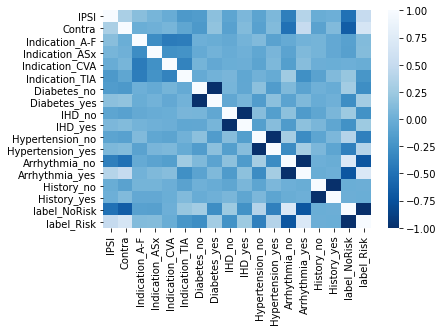

In [71]:
my_heatmap = sns.heatmap(correlation, cmap = 'Blues_r')

# Modelling

In [72]:
#removing the columns with 'no' to similify the dataframe and make it easier to use for modelling
model_df = concatdf.drop([ 'label_NoRisk','Arrhythmia_no', 'History_no', 'Hypertension_no', 'IHD_no', 'Diabetes_no'], axis = 1)


# Decision Tree 

using a 70/30 training/test split  

In [73]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk', ], axis = 1) 

In [74]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#I'm initally using a 70/30 split to compare with a different training/test split later 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, shuffle = True)
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  1064
Y training:  1064
X test:  456
Y test:  456


In [75]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#model.fit(X_train, Y_train)
fitModel = model.fit(X_train, Y_train)
train_y = model.predict(X_train)
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

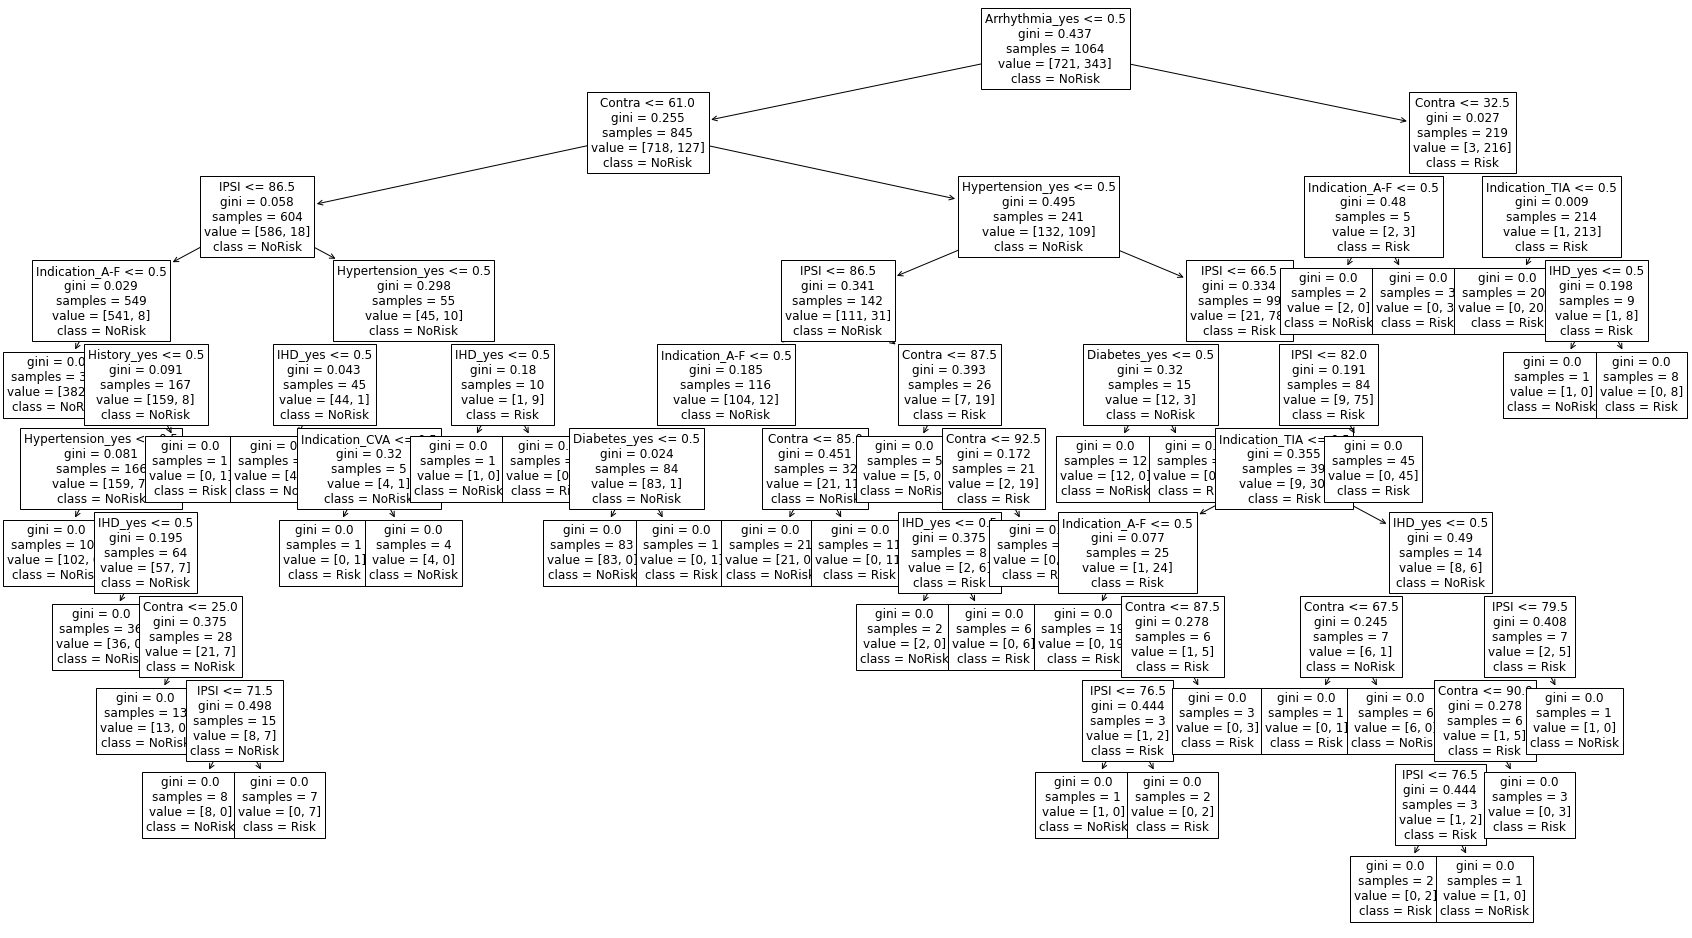

In [76]:
from sklearn.tree import plot_tree
plt.rcParams["figure.figsize"] = (30,17)
fn = ['IPSI', 'Contra', 'Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA', 'Diabetes_yes', 'IHD_yes', 'Hypertension_yes', 'Arrhythmia_yes', 'History_yes']
cn =['NoRisk','Risk']
tree = plot_tree(fitModel, feature_names= fn, fontsize = 12, class_names= cn, )

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y)

array([[289,   1],
       [  4, 162]], dtype=int64)

In [78]:
#model score
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(Y_train, train_y)
test_acc =accuracy_score(y_pred, pred_y)
print('train: ',(train_acc))
print('test: ', (test_acc))


train:  1.0
test:  0.9890350877192983


In [79]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

2.2390350877192984

In [80]:
from sklearn.model_selection import cross_val_score
#I used 5 folds to make sure each fold had a decent sample size for testing. Each 304 data units for testing
#I also used cross val to make sure my model score is consistent throughout the data size
cvs = fitModel
cross_val_score(fitModel, X, y, cv = 5)

array([0.98026316, 0.97697368, 0.99671053, 0.98684211, 0.97697368])

Using a 30/70 training test split

In [81]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk', ], axis = 1) 

In [82]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#I'm choosing a 65 training/35 testing split 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.70, shuffle = True)

In [83]:
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  456
Y training:  456
X test:  1064
Y test:  1064


In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [85]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

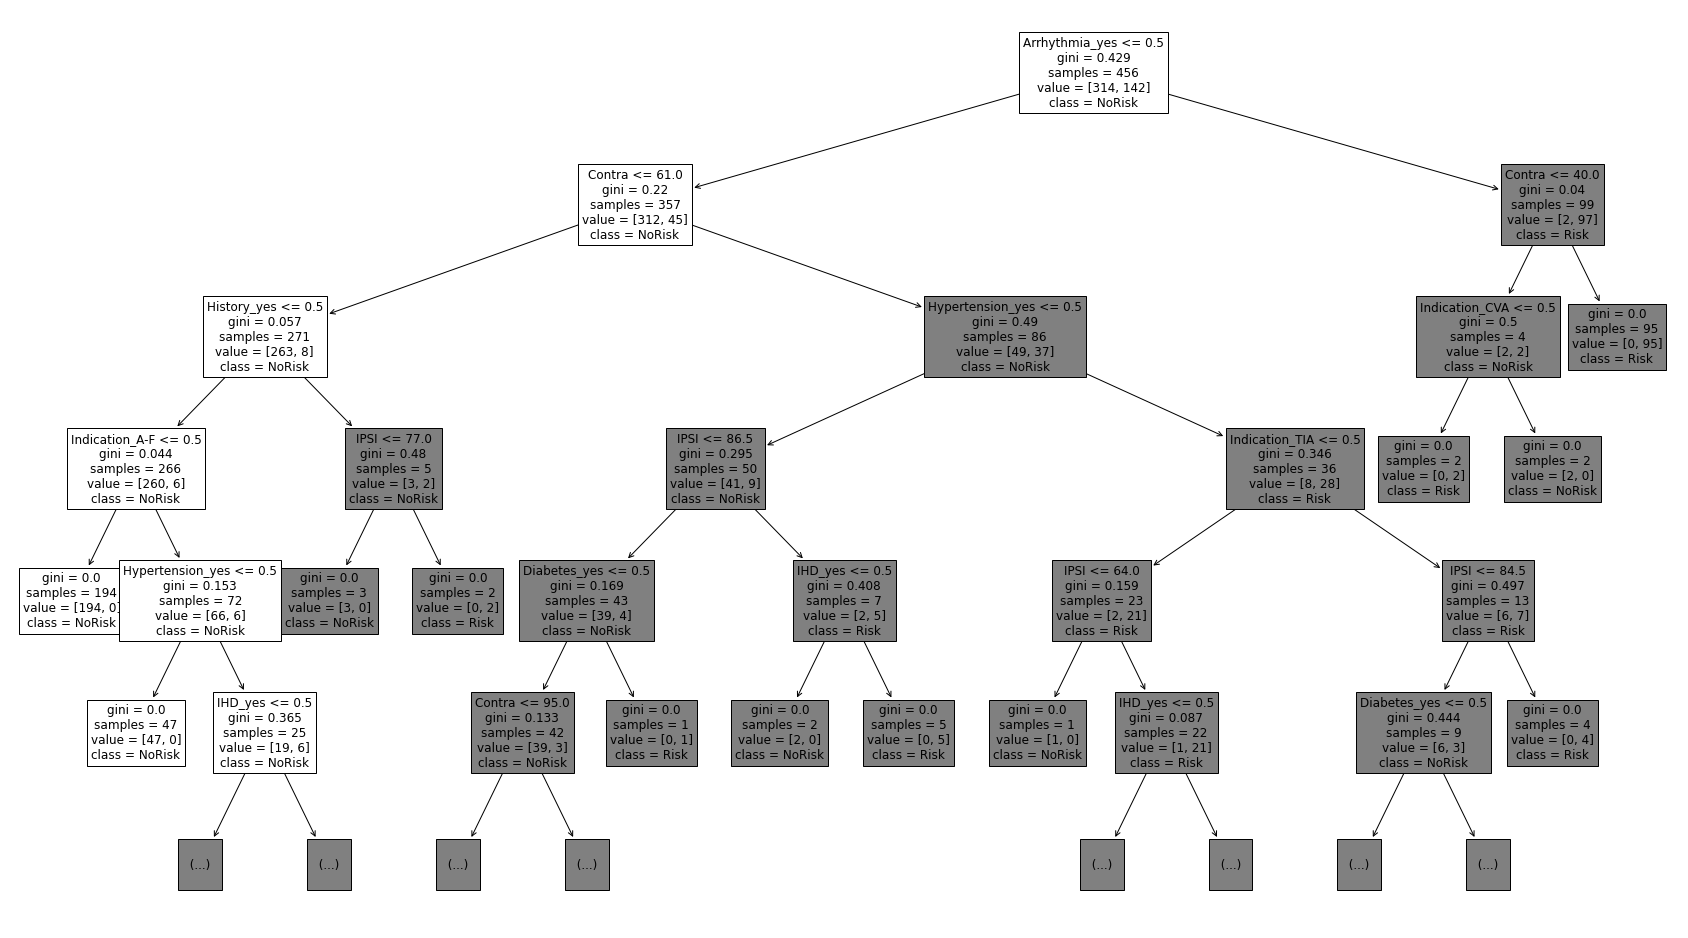

In [86]:
from sklearn.tree import plot_tree
plt.rcParams["figure.figsize"] = (30,17)
fn = ['IPSI', 'Contra', 'Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA', 'Diabetes_yes', 'IHD_yes', 'Hypertension_yes', 'Arrhythmia_yes', 'History_yes']
cn =['NoRisk','Risk']
tree = plot_tree(fitModel, feature_names= fn, fontsize = 12, class_names= cn, max_depth= 5)

In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y).ravel()

array([692,   5,  22, 345], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.974624060150376

In [89]:
from sklearn.model_selection import cross_val_score
#I used 5 folds to make sure each fold had a decent sample size for testing. Each 304 data units for testing
#I also used cross val to make sure my model score is consistent throughout the data size
cvs = fitModel
cross_val_score(fitModel, X, y, cv = 5)

array([0.98026316, 0.97697368, 0.99342105, 0.99013158, 0.97039474])

In [90]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

5.277255639097745

Using a 50/50 split

In [91]:
#I first choose to train the Risk label against every other column in the dataframe
y = model_df['label_Risk']
X = model_df.drop(['label_Risk', ], axis = 1) 

In [92]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#I'm choosing a 65 training/35 testing split 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5, shuffle = True)

In [93]:
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  760
Y training:  760
X test:  760
Y test:  760


In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [95]:
#model.fit(X_train, Y_train)
fitModel = model.fit(X_train, Y_train)

In [96]:
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

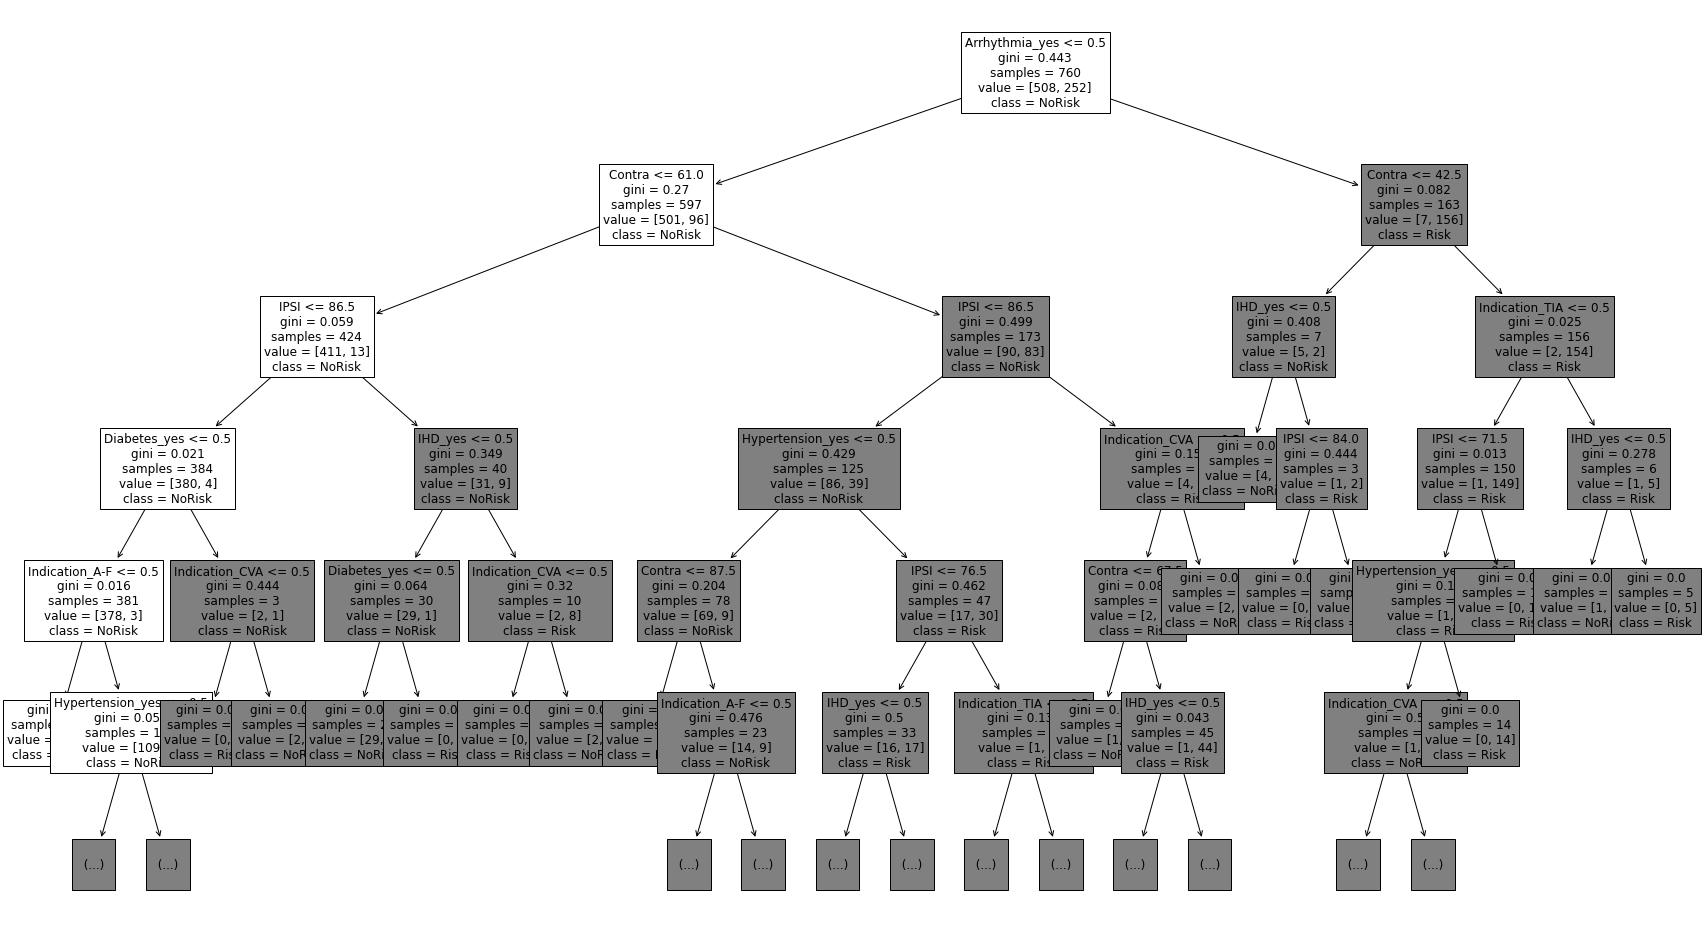

In [97]:
from sklearn.tree import plot_tree
plt.rcParams["figure.figsize"] = (30,17)
fn = ['IPSI', 'Contra', 'Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA', 'Diabetes_yes', 'IHD_yes', 'Hypertension_yes', 'Arrhythmia_yes', 'History_yes']
cn =['NoRisk','Risk']
tree = plot_tree(fitModel, feature_names= fn, fontsize = 12, class_names= cn, max_depth= 5)


In [98]:
 from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y).ravel()

array([501,   2,   6, 251], dtype=int64)

In [99]:
#model score
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9894736842105263

In [100]:
from sklearn.model_selection import cross_val_score
#I used 5 folds to make sure each fold had a decent sample size for testing. Each 304 data units for testing
#I also used cross val to make sure my model score is consistent throughout the data size
cvs = fitModel
cross_val_score(fitModel, X, y, cv = 5)

array([0.98026316, 0.97039474, 0.99671053, 0.99013158, 0.97039474])

In [101]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

2.0157894736842104

Using Contra, Arrhythmia, IPSI, and Hypertension on 70/30 training/test split

In [102]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = model_df['label_Risk']
X = model_df.drop(['label_Risk','Diabetes_yes', 'IHD_yes', 'History_yes','Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA'], axis = 1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [103]:
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  1064
Y training:  1064
X test:  456
Y test:  456


In [104]:
fitModel = model.fit(X_train, Y_train)

In [105]:
pred_y = model.predict(X_test)
y_pred = Y_test

In [106]:
 from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y).ravel()

array([305,   6,  13, 132], dtype=int64)

In [107]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

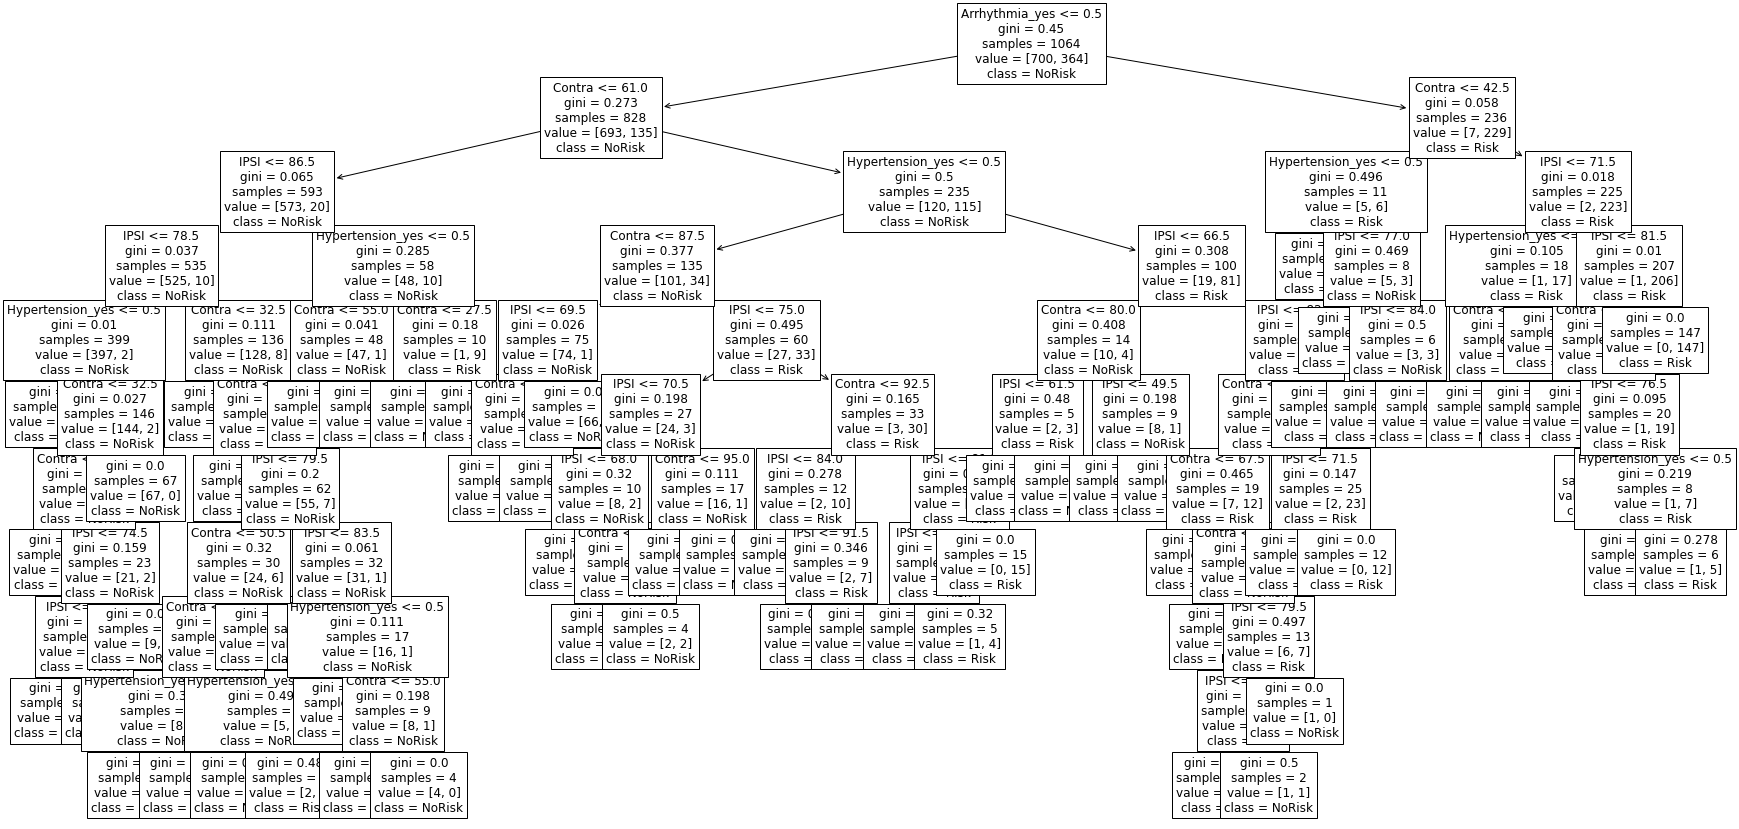

In [108]:

plt.rcParams["figure.figsize"] = (30,15)
fn = ['IPSI', 'Contra',  'Hypertension_yes', 'Arrhythmia_yes',]
cn =['NoRisk','Risk']
tree = plot_tree(fitModel, feature_names= fn, fontsize = 12, class_names= cn,)


In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9583333333333334

In [110]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

7.282894736842105

In [111]:
from sklearn.model_selection import cross_val_score

cvs = fitModel
cross_val_score(cvs, X, y, cv = 5)

array([0.95394737, 0.93421053, 0.95723684, 0.96052632, 0.96381579])

Using Contra, Arrhythmia, IPSI, and Hypertension on 30/70 training/test split

In [112]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = model_df['label_Risk']
X = model_df.drop(['label_Risk','Diabetes_yes', 'IHD_yes', 'History_yes','Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA'], axis = 1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.7, shuffle = True)

print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  456
Y training:  456
X test:  1064
Y test:  1064


In [113]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

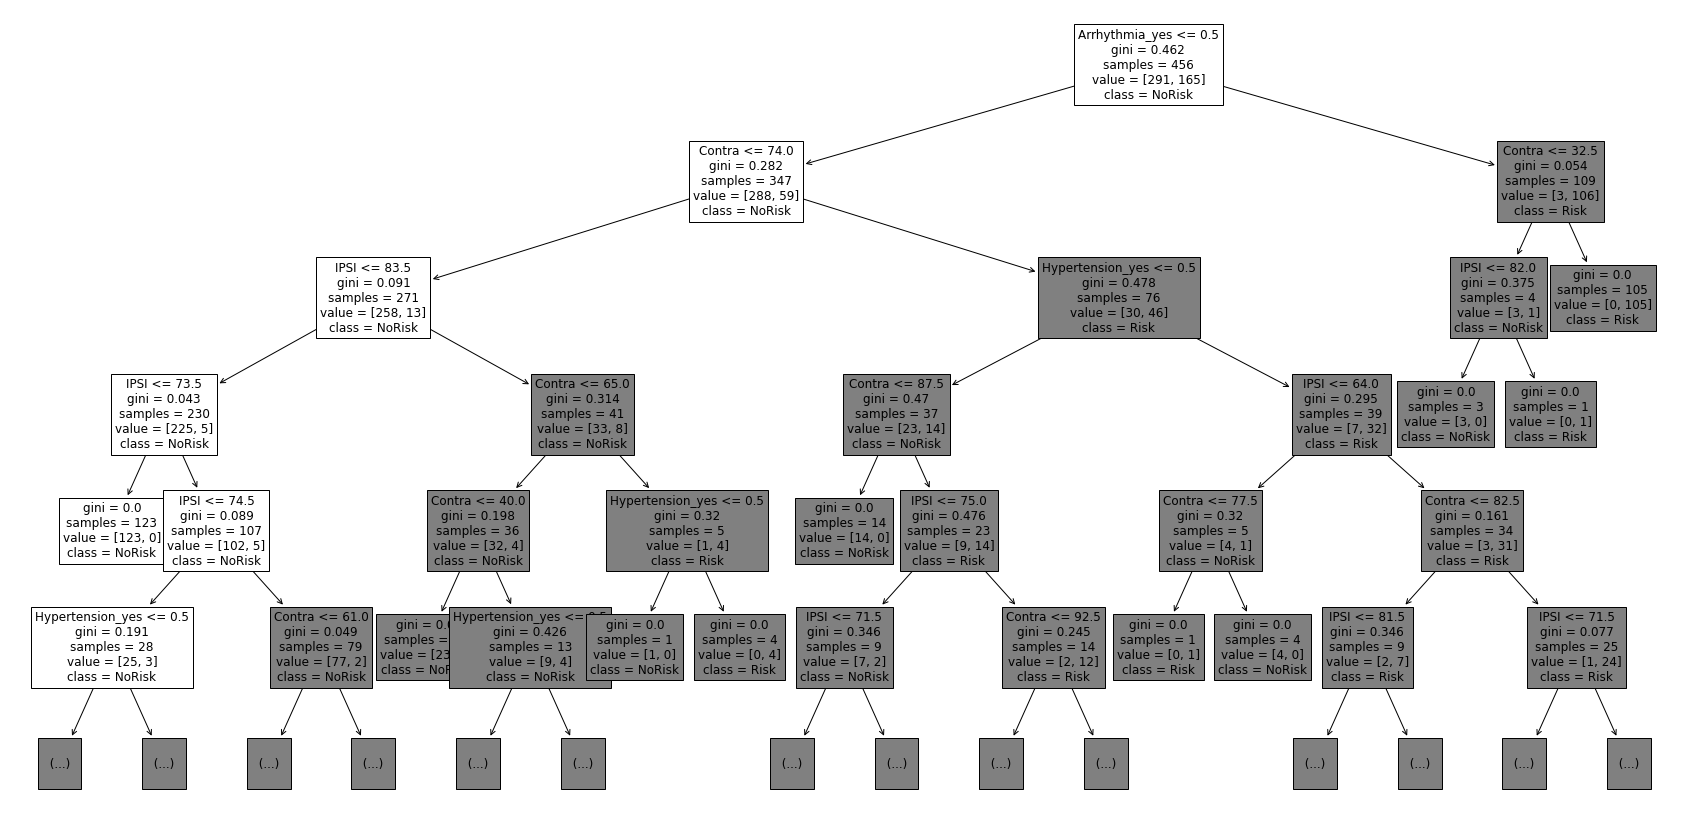

In [114]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
plt.rcParams["figure.figsize"] = (30,15)
fn = ['IPSI', 'Contra',  'Hypertension_yes', 'Arrhythmia_yes', ]
cn =['NoRisk','Risk']
tree = plot_tree(fitModel, feature_names= fn, fontsize = 12, class_names= cn, max_depth= 5)

In [115]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y).ravel()

array([701,  19,  41, 303], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.943609022556391

In [117]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

9.843984962406015

Using Contra, Arrhythmia, IPSI, and Hypertension on 50/50 training/test split

In [118]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = model_df['label_Risk']
X = model_df.drop(['label_Risk','Diabetes_yes', 'IHD_yes', 'History_yes','Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA'], axis = 1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5, shuffle = True)

print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  760
Y training:  760
X test:  760
Y test:  760


In [119]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

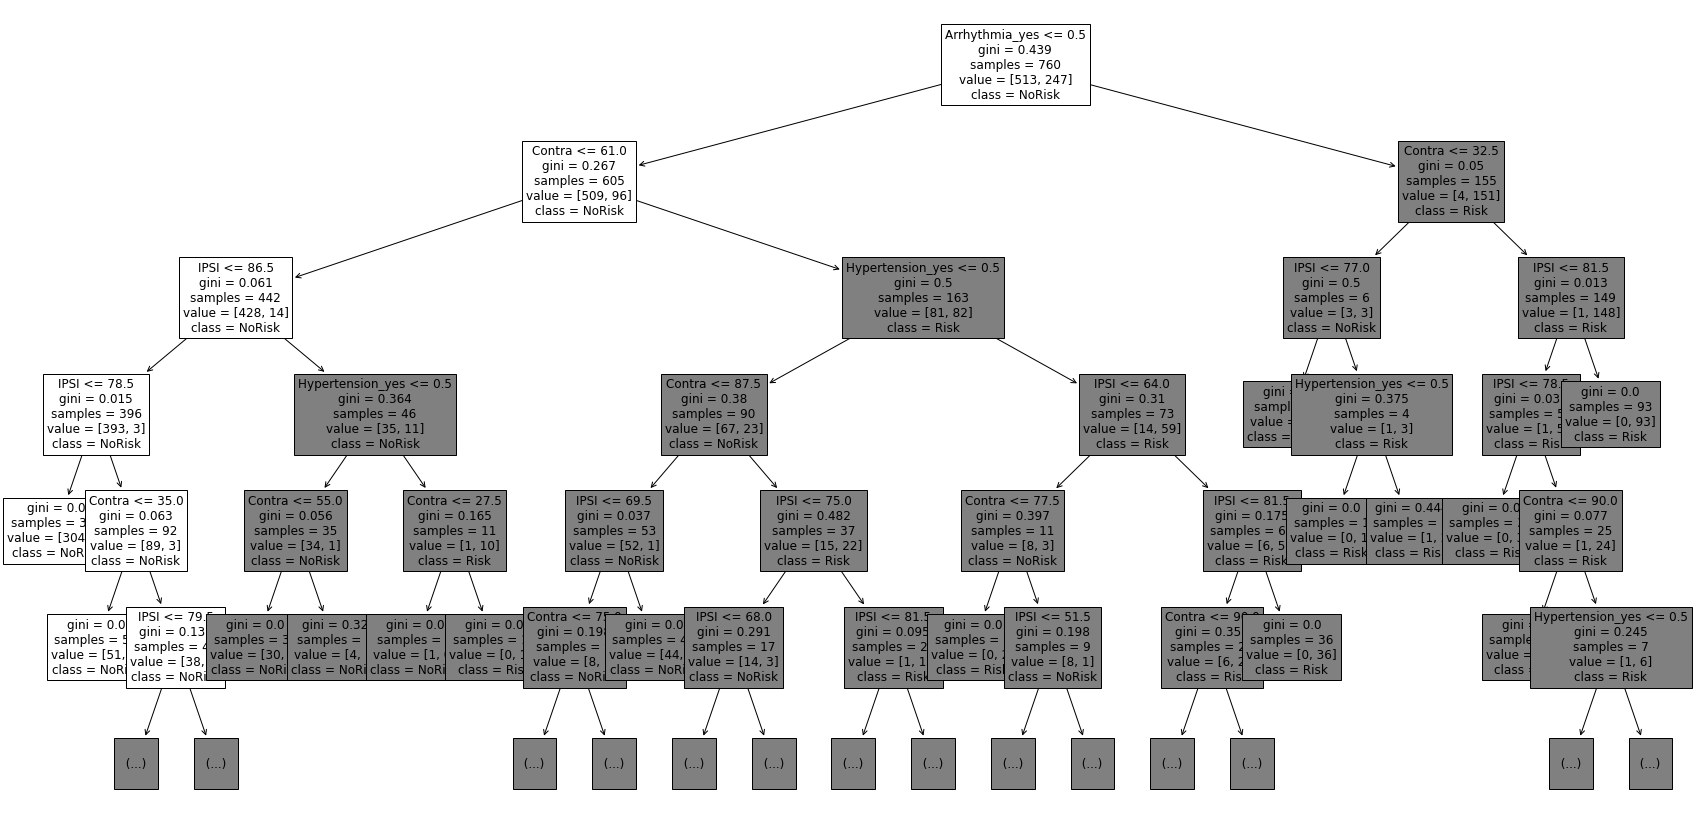

In [120]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
plt.rcParams["figure.figsize"] = (30,15)
fn = ['IPSI', 'Contra',  'Hypertension_yes', 'Arrhythmia_yes', ]
cn =['NoRisk','Risk']
tree = plot_tree(fitModel, feature_names= fn, fontsize = 12, class_names= cn, max_depth= 5)

In [121]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y)

array([[482,  16],
       [ 20, 242]], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9526315789473684

In [123]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

6.731578947368421

# Random Forest trees

Using all attributes on a 70/30 training split

In [124]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  1064
Y training:  1064
X test:  456
Y test:  456


In [125]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,)
fitModel = model.fit(X_train, Y_train)
model

RandomForestClassifier()

In [126]:
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

In [127]:
 from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y)

array([[312,   1],
       [  4, 139]], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9890350877192983

In [129]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

2.2390350877192984

In [130]:
from sklearn.model_selection import cross_val_score

cvs = fitModel
cross_val_score(fitModel, X, y, cv = 5)

array([0.98355263, 0.97039474, 1.        , 0.99342105, 0.99013158])

Using a 30/70 training/test split

In [131]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.7, shuffle = True)

print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  456
Y training:  456
X test:  1064
Y test:  1064


In [132]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
fitModel = model.fit(X_train, Y_train)
model

RandomForestClassifier()

In [133]:
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

In [134]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y).ravel()

array([711,   5,  13, 335], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9830827067669173

In [136]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

3.1203007518796992

Using Contra, Arrhythmia, IPSI, and Hypertension using 70/30

In [137]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk','Diabetes_yes', 'IHD_yes', 'History_yes','Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA'], axis = 1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [138]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

fitModel = model.fit(X_train, Y_train)
model

RandomForestClassifier()

In [139]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [140]:
confusion_matrix(y_pred, pred_y).ravel()

array([298,   7,   6, 145], dtype=int64)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9714912280701754

In [142]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

3.370614035087719

In [143]:
from sklearn.model_selection import cross_val_score

cvs = fitModel
cross_val_score(fitModel, X, y, cv = 5)

array([0.95723684, 0.9375    , 0.96710526, 0.96052632, 0.96381579])

Using Contra, Arrhythmia, IPSI, and Hypertension using 30/70

In [144]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = model_df['label_Risk']
X = model_df.drop(['label_Risk', 'label_Risk','Diabetes_yes', 'IHD_yes', 'History_yes','Indication_A-F', 'Indication_ASx', 'Indication_CVA', 'Indication_TIA'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.7, shuffle = True)

print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  456
Y training:  456
X test:  1064
Y test:  1064


In [145]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

fitModel = model.fit(X_train, Y_train)
model

RandomForestClassifier()

In [146]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [147]:
confusion_matrix(y_pred, pred_y).ravel()

array([673,  30,  20, 341], dtype=int64)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9530075187969925

In [149]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

4.821428571428571

Using Contra, Arrhythmia, IPSI, and Hypertension on 70/30 training/test split

# MLP Classifer

Comparing SGD to minibatching

In [150]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [151]:
#using a high mini-batch size
from sklearn.neural_network import MLPClassifier 
model = MLPClassifier(solver ='sgd', batch_size= 200, activation = 'relu', hidden_layer_sizes = 100, learning_rate= 'constant', max_iter = 1000)

In [152]:
fitModel =model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [153]:
confusion_matrix(y_pred, pred_y)

array([[198, 104],
       [ 15, 139]], dtype=int64)

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.7390350877192983

In [155]:
cross_val_score(fitModel, X, y, cv = 5)

array([0.66447368, 0.75      , 0.81907895, 0.74342105, 0.75986842])

In [156]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

8.616228070175438

In [157]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, shuffle = True)

In [158]:
from sklearn.neural_network import MLPClassifier 
model = MLPClassifier(solver= 'sgd', batch_size= 1, activation = 'relu',  hidden_layer_sizes= 100,  max_iter = 1000)

In [159]:
fitModel =model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [160]:
confusion_matrix(y_pred, pred_y).ravel()

array([316,   0, 140,   0], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.6929824561403509

In [162]:
cross_val_score(fitModel, X, y, cv = 5)

array([0.66447368, 0.66447368, 0.66447368, 0.66447368, 0.66776316])

In [163]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, pred_y)

78.28947368421052

In [164]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [165]:
#tanh has really high accuracies
#change the batch size to 12
from sklearn.neural_network import MLPClassifier 
model = MLPClassifier(solver ='sgd', batch_size= 100, activation = 'relu', hidden_layer_sizes= 100, learning_rate= 'constant', max_iter = 1000)

In [166]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [167]:
confusion_matrix(y_pred, pred_y)

array([[290,   7],
       [ 61,  98]], dtype=int64)

In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.8508771929824561

In [169]:
cross_val_score(fitModel, X, y, cv = 5)

array([0.81578947, 0.77960526, 0.80263158, 0.88157895, 0.72697368])

Using different activation functions

In [170]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)
from sklearn.neural_network import MLPClassifier 

#trying a sigmoid function
model = MLPClassifier( solver= 'sgd', activation = 'logistic', hidden_layer_sizes= 100, learning_rate= 'constant', max_iter = 1500)

In [171]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [172]:
confusion_matrix(y_pred, pred_y)

array([[289,  11],
       [ 29, 127]], dtype=int64)

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.9122807017543859

In [174]:
cross_val_score(fitModel, X, y, cv = 5)

array([0.80263158, 0.84868421, 0.81578947, 0.89144737, 0.875     ])

In [175]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)
from sklearn.neural_network import MLPClassifier 

#trying a linear function
model = MLPClassifier( solver= 'sgd', activation = 'identity', hidden_layer_sizes= 100, learning_rate= 'constant', max_iter = 1000)

In [176]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [177]:
confusion_matrix(y_pred, pred_y)

array([[281,  21],
       [ 52, 102]], dtype=int64)

In [178]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.8399122807017544

In [179]:
cross_val_score(fitModel, X, y, cv = 5)

array([0.73026316, 0.85197368, 0.64473684, 0.78947368, 0.71381579])

In [180]:
y = model_df['label_Risk']
X = model_df.drop(['label_Risk'], axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)
from sklearn.neural_network import MLPClassifier 
model = MLPClassifier( solver= 'sgd', activation = 'relu', hidden_layer_sizes= 100, learning_rate= 'constant', max_iter = 1000)

In [181]:
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
y_pred = Y_test

In [182]:
confusion_matrix(y_pred, pred_y)

array([[293,  10],
       [ 60,  93]], dtype=int64)

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.8464912280701754

In [184]:
cross_val_score(fitModel, X, y, cv = 5)

array([0.66447368, 0.67105263, 0.61184211, 0.85197368, 0.75657895])